# AJIVE demonstration

This notebook deomonstrations some of the AJIVE functionality. The notebook assumes the reader has knowledge of AJIVE and is looking to understand the basic functionality of this particular python implementaion.

In [1]:
import numpy as np
from __future__ import print_function 
import matplotlib.pyplot as plt
%matplotlib inline

from jive.AJIVE import AJIVE
from jive.PCA import PCA
from jive.ajive_fig2 import generate_data_ajive_fig2
from jive.viz.block_visualization import data_block_heatmaps, jive_full_estimate_heatmaps

# Generate some toy, two block data

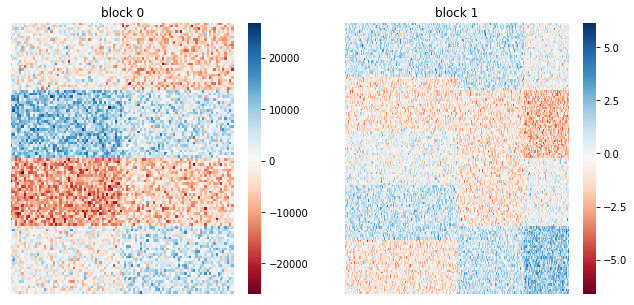

In [2]:
X, Y = generate_data_ajive_fig2()

plt.figure(figsize=[11,  5])
data_block_heatmaps([X, Y])

# Run AJIVE

### 1. Estimate initial signal rank using scree plots

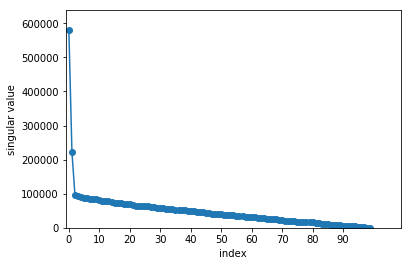

In [3]:
# based on this scree plot, we set the initial signal rank for the X block to 2
PCA().fit(X).plot_scree()

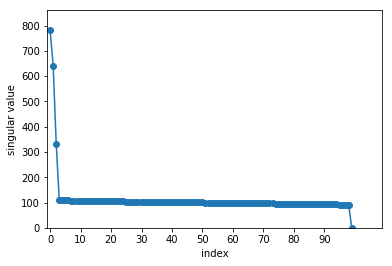

In [4]:
# based on this scree plot, we set the initial signal rank for the X block to 3
PCA().fit(Y).plot_scree()

### Run  AJIVE procedure

The only required parameter is `init_signal_ranks`. Note AJIVE will mean center the columns by default!

In [5]:
ajive = AJIVE(init_signal_ranks={'x': 2, 'y': 3})
ajive.fit(blocks={'x': X, 'y': Y})

# passing the arguments in a lists also works
# ajive = AJIVE(init_signal_ranks=[2, 3])
# ajive.fit(blocks=[X, Y])

AJIVE, joint rank: 1, block x indiv rank: 1, block y indiv rank: 2

# Results

Below are some of the data jive computes by default

- `jive.common` stores the common joint information (e.g. common joint scores)
- `jive.blocks`[**BLOCKNAME**`].joint` stores the block specific joint information for block **BLOCKNAME**
- `jive.blocks[`**BLOCKNAME**`].individual` stores the block specific individual information for block **BLOCKNAME**

Note that each of these are `jive.PCA.PCA` objects. See the PCA_demo.ipynb notebook and the `jive.PCA.PCA` documentaiton for further explaination.

In [6]:
print('joint rank:', ajive.common.rank)
ajive.common.scores_

joint rank: 1


array([[ 0.08821291],
       [ 0.11660884],
       [ 0.08695879],
       [ 0.08864602],
       [ 0.09842721],
       [ 0.08602341],
       [ 0.11033328],
       [ 0.08882595],
       [ 0.08699549],
       [ 0.08333971],
       [ 0.08427316],
       [ 0.08781619],
       [ 0.08861843],
       [ 0.09142574],
       [ 0.0888183 ],
       [ 0.10616899],
       [ 0.06594091],
       [ 0.09126915],
       [ 0.08646629],
       [ 0.09779892],
       [ 0.09490117],
       [ 0.09279964],
       [ 0.11092133],
       [ 0.10110421],
       [ 0.0995708 ],
       [ 0.11551676],
       [ 0.11357558],
       [ 0.10752813],
       [ 0.10934011],
       [ 0.10539763],
       [ 0.10476881],
       [ 0.11052374],
       [ 0.10941799],
       [ 0.09647897],
       [ 0.11972361],
       [ 0.11366716],
       [ 0.09847999],
       [ 0.10596577],
       [ 0.09524767],
       [ 0.11317311],
       [ 0.10325178],
       [ 0.09315322],
       [ 0.11043525],
       [ 0.1086692 ],
       [ 0.11470611],
       [ 0

In [7]:
print('y block individual rank:', ajive.blocks['y'].individual.rank)
ajive.blocks['y'].individual.loadings_

y block individual rank: 2


array([[-4.14272325e-03,  1.24307935e-02],
       [ 3.06932394e-05,  1.41104771e-02],
       [-8.21405360e-04,  1.20591632e-02],
       ...,
       [ 1.53190898e-02,  1.47383078e-03],
       [ 1.26545958e-02,  4.03497374e-03],
       [ 1.53271374e-02,  2.21724280e-03]])

In [8]:
# the full joint, individual and noise matrices are available as follows
print(ajive.blocks['y'].joint.full_.shape)
print(ajive.blocks['y'].individual.full_.shape)
print(ajive.blocks['y'].noise_.shape)

(100, 10000)
(100, 10000)
(100, 10000)


### heatmaps of full estimates

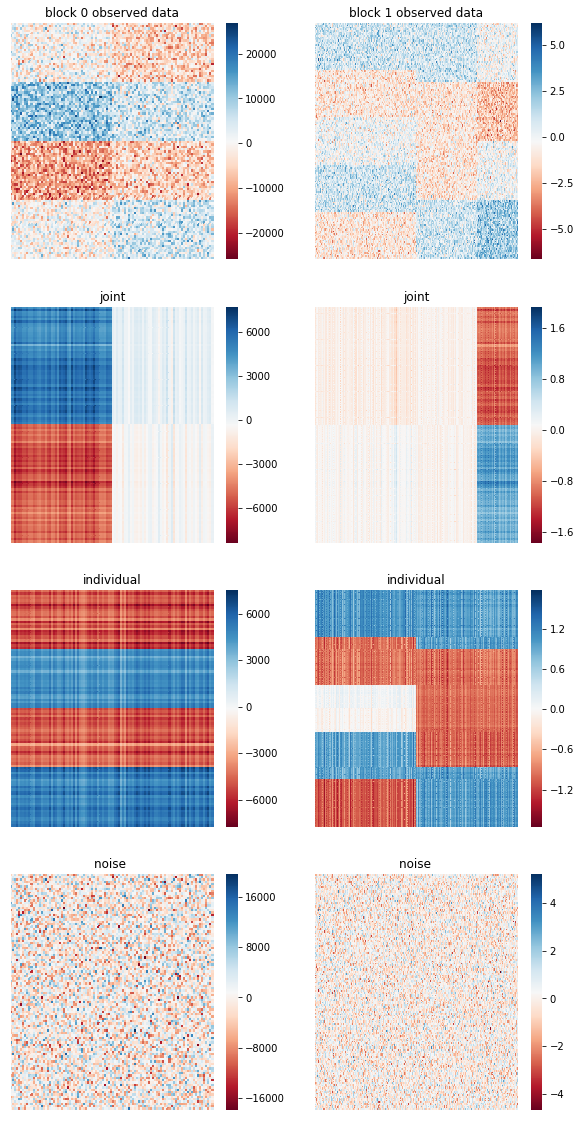

In [9]:
plt.figure(figsize=[10, 20])
jive_full_estimate_heatmaps(ajive.get_full_block_estimates(), blocks={'x':X, 'y': Y})

### Visualize joint and individual modes of variation

/Users/iaincarmichael/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


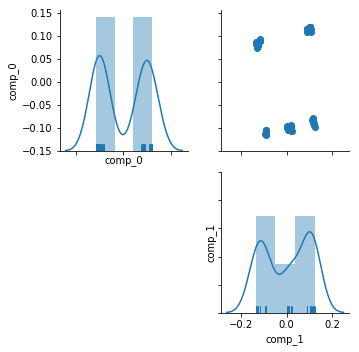

In [10]:
# Notice there are distinct clusters in the second block's individual scores
ajive.blocks['y'].individual.plot_scores()

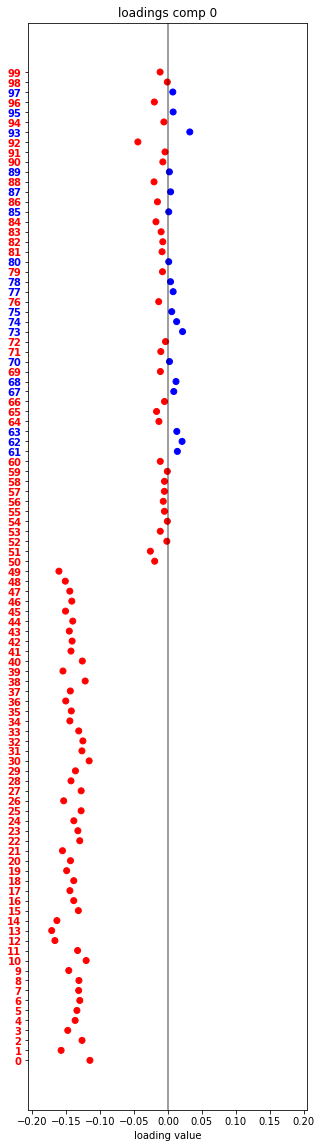

In [11]:
# notice the first joint loadings component seems 
# to be driven by variables 0-50 (which it should!)
plt.figure(figsize=[5, 20])
ajive.blocks['x'].joint.plot_loading(comp=0, abs_sorted=False)

# User can specify joint and/or individual ranks

In [12]:
AJIVE(init_signal_ranks=[2, 3], joint_rank=4, reconsider_joint_components=False).fit(blocks=[X, Y])

AJIVE, joint rank: 4, block 0 indiv rank: 0, block 1 indiv rank: 0

In [13]:
AJIVE(init_signal_ranks=[2, 3], indiv_ranks=[2, 2], reconsider_joint_components=False).fit(blocks=[X, Y])

AJIVE, joint rank: 1, block 0 indiv rank: 2, block 1 indiv rank: 2

In [14]:
AJIVE(init_signal_ranks=[2, 3], joint_rank=2, indiv_ranks=[2, 2], reconsider_joint_components=False).fit(blocks=[X, Y])

AJIVE, joint rank: 2, block 0 indiv rank: 2, block 1 indiv rank: 2

# Precomputed data
The hard computations in AJIVE are

- low rank initial block SVDs
- wedin samples
- random direction bound smaples

The user may precompute these on their own (e.g. using a computing cluster). 

### Precomputed SVD

For each block, the precomputed SVD has to be provided as a dict whose keys are ['scores', 'svs', 'loadings']

In [15]:
# precomputed the X blocks SVD
# be careful to center the same way as AJIVE!
from jive.utils import pca_wrapper, centering

U, D, V = pca_wrapper(X)  # pca = mean center then SVD
x_init_svd = {'scores': U, 'svs': D, 'loadings': V}

y_init_svd = None

ajive = AJIVE(init_signal_ranks={'x': 2, 'y': 3})
ajive.fit(blocks={'x': X, 'y': Y}, precomp_init_svd={'x': x_init_svd, 'y': y_init_svd})

AJIVE, joint rank: 1, block x indiv rank: 1, block y indiv rank: 2